In [3]:
import os
import site
from pathlib import Path
path = Path(os.getcwd())
site.addsitedir(path.parent)  # Always appends to end
from utils.date2datetime import *
from utils.dataset_cleaning import *
from utils.dataset_joining import *
#from utils.date_functions import *
from utils.geographic_distance import *
from utils.preprocess_training_set_airport import *

In [4]:
dir_folder = '/Users/jonnypreuss/Documents/01_Uni/01_Paris/01_Courses/Y2T2/Hackathon/'

In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [12]:
weather_path = '01_Resources/Data/Weather_data.csv'
df_w = pd.read_csv(dir_folder + weather_path)
df_w

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678897,12/31/2019 21:00,Clear,clear-night,0.0,0.0,44.17,39.56,39.23,0.83,1031.8,8.25,20.27,102.0,0.26,0.0,6.391,None,0.0,313.3
678898,12/31/2019 22:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6
678899,12/31/2019 22:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6
678900,12/31/2019 22:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6


In [13]:
aircraft_path = '01_Resources/Data/ACchar.xlsx'
df_a = pd.read_excel(dir_folder + aircraft_path, sheet_name='test')
df_a

,Date Completed,Manufacturer,A320-100,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed\n(Vref),Wingtip Configuration,"Wingspan, ft","Length, ft","Tail Height, ft\n(@ OEW)","Wheelbase, ft",Cockpit to Main Gear (CMG),MGW\n(Outer to Outer),MTOW,Max Ramp\nMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1,A,I,1A,55.9,no winglets,19.5833,17.5,6,tbd,tbd,tbd,1350,1520,S,ACRO,L,Small Eqpt,tbd,tbd,342.708
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1,A,I,1A,59.8,no winglets,21.6667,18.8542,6.64583,tbd,tbd,tbd,1520,1520,S,ACR2,L,Small Eqpt,tbd,tbd,408.507
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1,A,I,1A,45.5,no winglets,20.5,18.9167,5.5,tbd,tbd,tbd,1250,1250,S,COUG,L,Small Eqpt,tbd,tbd,387.792
3,2018-07-03 00:00:00,Acro Sport,Junior Ace,Piston,1,A,I,1A,49.4,no winglets,26.5,18,tbd,tbd,tbd,tbd,1225,1225,S,JACE,L,Small Eqpt,tbd,tbd,477
4,2018-07-03 00:00:00,Acro Sport,Super Ace,Piston,1,A,I,1A,49.4,no winglets,27.2917,18.5,6.5,tbd,tbd,tbd,1030,1030,S,SACE,L,Small Eqpt,tbd,tbd,504.896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,NaN,Zlin,Zlin Z-50,tbd,tbd,No Value,No Value,tbd,NaN,tbd,NaN,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,BA11,M,tbd,tbd,tbd,NaN
2760,NaN,Zlin,Zlin Z-526 Akrobat,tbd,tbd,No Value,No Value,tbd,NaN,tbd,NaN,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,NaN
2761,NaN,Zlin,Zlin Z-526 Trener Master,tbd,tbd,No Value,No Value,tbd,NaN,tbd,NaN,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,NaN
2762,NaN,Zlin,Zlin Z-626,tbd,tbd,No Value,No Value,tbd,NaN,tbd,NaN,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,tbd,NaN


In [8]:
#df_apt_geo = pd.read_csv("C:\\Data\\Hackathon\\0. Airport data\\geographic_data.csv")
#date2datetime

In [14]:
airport_path = '01_Resources/Data/training_set_airport_data.csv'
df_apt_time = pd.read_csv(dir_folder + airport_path)
df_apt_time

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,1/1/2015 6:00,B737-800 WINGLETS,1/1/2015 5:56,1/1/2015 6:05,STAND_62,RUNWAY_4
1,1/1/2015 6:10,A320-100/200,1/1/2015 6:08,1/1/2015 6:18,STAND_153,RUNWAY_4
2,1/1/2015 6:15,A320-100/200,1/1/2015 6:08,1/1/2015 6:19,STAND_44,RUNWAY_2
3,1/1/2015 6:20,A320-100/200,1/1/2015 6:24,1/1/2015 6:36,STAND_7,RUNWAY_3
4,1/1/2015 6:20,A319,1/1/2015 6:14,1/1/2015 6:27,STAND_17,RUNWAY_2
...,...,...,...,...,...,...
543808,12/31/2018 21:15,A350-900,12/31/2018 21:02,12/31/2018 21:20,STAND_150,RUNWAY_3
543809,12/31/2018 21:30,B787-900,12/31/2018 21:24,12/31/2018 21:38,STAND_77,RUNWAY_1
543810,12/31/2018 21:50,A330-200,12/31/2018 22:27,12/31/2018 22:37,STAND_120,RUNWAY_1
543811,12/31/2018 22:10,B787-800 Dreamliner,12/31/2018 22:09,12/31/2018 22:29,STAND_49,RUNWAY_2


In [15]:
geo_path = '01_Resources/Data/geographic_data.csv'
df_geo = pd.read_csv(dir_folder + geo_path)
df_geo

,runway,Lat_runway,Lng_runway,stand,Lat_stand,Lng_stand
0,RUNWAY_1,54.755307,-0.023040,stand_0,54.764575,0.000356
1,RUNWAY_2,54.757120,-0.024107,stand_1,54.764690,0.024353
2,RUNWAY_1,54.755307,-0.023040,stand_2,54.769141,0.011816
3,RUNWAY_1,54.755307,-0.023040,stand_3,54.772184,0.006803
4,RUNWAY_1,54.755307,-0.023040,stand_4,54.767007,0.008593
...,...,...,...,...,...,...
19540,RUNWAY_3,54.761173,0.019840,stand_27,54.764910,0.019822
19541,RUNWAY_3,54.761173,0.019840,stand_62,54.764729,0.018501
19542,RUNWAY_3,54.761173,0.019840,stand_101,54.769606,0.018924
19543,RUNWAY_3,54.761173,0.019840,stand_46,54.770406,0.007422


# Geographical Exploration

In [9]:
df_geo.shape

(19545, 6)

In [10]:
df_geo.duplicated().sum()

19157

In [11]:
print(df_geo['runway'].unique())
print(df_geo['Lat_runway'].unique())
print(df_geo['Lng_runway'].unique())
print()
print('first stand: '+str(df_geo['stand'].min()), 'and last stand: '+str(df_geo['stand'].max()))
print(df_geo['Lat_stand'].min(), df_geo['Lat_stand'].max())
print(df_geo['Lng_stand'].min(), df_geo['Lng_stand'].max())

['RUNWAY_1' 'RUNWAY_2' 'RUNWAY_3' 'RUNWAY_4']
[54.75530667 54.75712    54.76117333 54.76149333]
[-0.02304    -0.02410667  0.01984     0.00832   ]

first stand: stand_0 and last stand: stand_99
54.76108149 54.77394667
-0.009674027 0.026379307


In [12]:
print(df_geo['runway'].value_counts())
print()
print(df_geo['Lat_runway'].value_counts())
print()
print(df_geo['Lng_runway'].value_counts())

RUNWAY_1    12428
RUNWAY_3     7011
RUNWAY_2       67
RUNWAY_4       39
Name: runway, dtype: int64

54.755307    12428
54.761173     7011
54.757120       67
54.761493       39
Name: Lat_runway, dtype: int64

-0.023040    12428
 0.019840     7011
-0.024107       67
 0.008320       39
Name: Lng_runway, dtype: int64


In [13]:
print(df_geo['stand'].value_counts())
print()
print(df_geo['Lat_stand'].value_counts())
print()
print(df_geo['Lng_stand'].value_counts())

stand_52     466
stand_47     456
stand_49     440
stand_58     439
stand_56     438
            ... 
stand_163      1
stand_164      1
stand_156      1
stand_136      1
stand_148      1
Name: stand, Length: 167, dtype: int64

54.766009    466
54.765807    456
54.765274    446
54.767357    440
54.765719    439
            ... 
54.761259      1
54.765428      1
54.766258      1
54.762092      1
54.765164      1
Name: Lat_stand, Length: 159, dtype: int64

 0.012133    466
 0.010693    456
 0.011135    440
 0.010050    439
 0.011487    438
            ... 
 0.003849      1
 0.007627      1
-0.009535      1
 0.003887      1
 0.004839      1
Name: Lng_stand, Length: 165, dtype: int64


In [14]:
df_geo2 = df_geo.drop_duplicates()

In [15]:
df_geo2.head(20)

,runway,Lat_runway,Lng_runway,stand,Lat_stand,Lng_stand
0,RUNWAY_1,54.755307,-0.023040,stand_0,54.764575,0.000356
1,RUNWAY_2,54.757120,-0.024107,stand_1,54.764690,0.024353
2,RUNWAY_1,54.755307,-0.023040,stand_2,54.769141,0.011816
3,RUNWAY_1,54.755307,-0.023040,stand_3,54.772184,0.006803
4,RUNWAY_1,54.755307,-0.023040,stand_4,54.767007,0.008593
5,RUNWAY_1,54.755307,-0.023040,stand_5,54.767224,0.010157
6,RUNWAY_1,54.755307,-0.023040,stand_6,54.765274,0.012927
7,RUNWAY_1,54.755307,-0.023040,stand_7,54.765016,0.011064
8,RUNWAY_1,54.755307,-0.023040,stand_8,54.767553,0.020228
9,RUNWAY_1,54.755307,-0.023040,stand_9,54.764382,-0.001061


In [16]:
print(df_geo2['runway'].value_counts())
print()
print(df_geo2['Lat_runway'].value_counts())
print()
print(df_geo2['Lng_runway'].value_counts())

RUNWAY_1    162
RUNWAY_3    150
RUNWAY_2     42
RUNWAY_4     34
Name: runway, dtype: int64

54.755307    162
54.761173    150
54.757120     42
54.761493     34
Name: Lat_runway, dtype: int64

-0.023040    162
 0.019840    150
-0.024107     42
 0.008320     34
Name: Lng_runway, dtype: int64


In [17]:
print(df_geo2['stand'].value_counts())
print()
print(df_geo2['Lat_stand'].value_counts())
print()
print(df_geo2['Lng_stand'].value_counts())

stand_65     4
stand_92     4
stand_17     4
stand_27     4
stand_26     4
            ..
stand_152    1
stand_51     1
stand_132    1
stand_158    1
stand_149    1
Name: stand, Length: 167, dtype: int64

54.765274    6
54.764818    6
54.767481    6
54.770003    5
54.767132    5
            ..
54.766622    1
54.764593    1
54.762453    1
54.767250    1
54.772145    1
Name: Lat_stand, Length: 159, dtype: int64

 0.025686    4
 0.016548    4
 0.008252    4
 0.010050    4
 0.019822    4
            ..
 0.003887    1
-0.009535    1
 0.007627    1
 0.010219    1
-0.008222    1
Name: Lng_stand, Length: 165, dtype: int64


In [43]:
runways = df_geo2[['runway','Lat_runway', 'Lng_runway']]
runways = runways.drop_duplicates()
runways

,runway,Lat_runway,Lng_runway
0,RUNWAY_1,54.755307,-0.023040
1,RUNWAY_2,54.757120,-0.024107
1805,RUNWAY_3,54.761173,0.019840
11680,RUNWAY_4,54.761493,0.008320


In [44]:
stands = df_geo2[['stand','Lat_stand', 'Lng_stand']]
stands = stands.drop_duplicates()
stands

,stand,Lat_stand,Lng_stand
0,stand_0,54.764575,0.000356
1,stand_1,54.764690,0.024353
2,stand_2,54.769141,0.011816
3,stand_3,54.772184,0.006803
4,stand_4,54.767007,0.008593
...,...,...,...
14492,stand_162,54.764551,0.007704
15938,stand_163,54.765164,0.003849
16345,stand_164,54.769665,0.007627
16689,stand_165,54.772145,0.005333


In [ ]:
#pip install shapely

In [ ]:
#pip install geopandas

In [ ]:
#pip install descartes

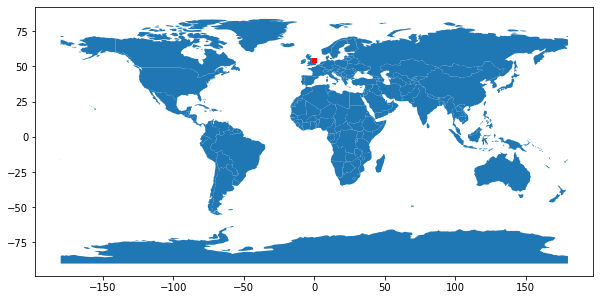

In [45]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_geo2['Lng_runway'], df_geo2['Lat_runway'])]
gdf = GeoDataFrame(df_geo2, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

                      geometry
0    POINT (-0.02304 54.75531)
1    POINT (-0.02411 54.75712)
2    POINT (-0.02304 54.75531)
3    POINT (-0.02304 54.75531)
4    POINT (-0.02304 54.75531)
..                         ...
383   POINT (0.01984 54.76117)
384   POINT (0.01984 54.76117)
385   POINT (0.01984 54.76117)
386   POINT (0.01984 54.76117)
387   POINT (0.01984 54.76117)

[388 rows x 1 columns]


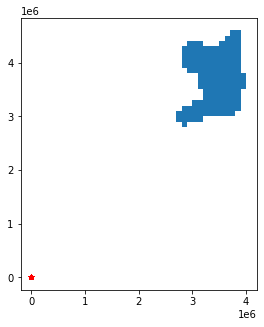

In [46]:
import matplotlib.pyplot as plt

uk_map = gpd.read_file('/Users/jonnypreuss/Documents/01_Uni/01_Paris/01_Courses/Y2T2/Hackathon/01_Resources/Data/Great_Britain_shapefile/gb_100km.shp')
fig,ax = plt.subplots(figsize = (5,5))
uk_map.plot(ax = ax)
geometry = [Point(xy) for xy in zip(df_geo2['Lng_runway'], df_geo2['Lat_runway'])]
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi')
plt.show()

In [ ]:
#pip install contextily

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/anaconda3/lib/python3.7/site-packages/contextily/tile.py:579: RuntimeWarning: invalid value encountered in subtract
  lon_length = np.subtract(*lon_range)
/anaconda3/lib/python3.7/site-packages/contextily/tile.py:584: RuntimeWarning: divide by zero encountered in double_scalars
  zoom_lat = np.ceil(np.log2(360 * 2.0 / lat_length))


ValueError: cannot convert float NaN to integer

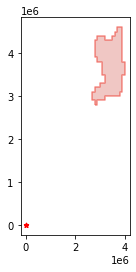

In [47]:
import contextily as ctx

long =[-0.02304, -0.02410667, 0.01984, 0.00832]
lat = [54.75530667, 54.75712, 54.76117333, 54.76149333]
geometry = [Point(xy) for xy in zip(long,lat)]


wardlink = '/Users/jonnypreuss/Documents/01_Uni/01_Paris/01_Courses/Y2T2/Hackathon/01_Resources/Data/Great_Britain_shapefile/gb_100km.shp'

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

# plot the polygon
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'UK', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [ ]:
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())

# Dataset Cleaning

In [17]:
df_airport_clean = clean_airport(dir_folder + airport_path)
df_airport_clean

,flight_datetime,aircraft_model,AOBT,ATOT,stand,runway
0,2015-01-01 06:00:00,B737-800 WINGLETS,1/1/2015 5:56,1/1/2015 6:05,STAND_62,RUNWAY_4
1,2015-01-01 06:10:00,A320-100/200,1/1/2015 6:08,1/1/2015 6:18,STAND_153,RUNWAY_4
2,2015-01-01 06:15:00,A320-100/200,1/1/2015 6:08,1/1/2015 6:19,STAND_44,RUNWAY_2
3,2015-01-01 06:20:00,A320-100/200,1/1/2015 6:24,1/1/2015 6:36,STAND_7,RUNWAY_3
4,2015-01-01 06:20:00,A319,1/1/2015 6:14,1/1/2015 6:27,STAND_17,RUNWAY_2
...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,12/31/2018 21:02,12/31/2018 21:20,STAND_150,RUNWAY_3
543809,2018-12-31 21:30:00,B787-900,12/31/2018 21:24,12/31/2018 21:38,STAND_77,RUNWAY_1
543810,2018-12-31 21:50:00,A330-200,12/31/2018 22:27,12/31/2018 22:37,STAND_120,RUNWAY_1
543811,2018-12-31 22:10:00,B787-800 Dreamliner,12/31/2018 22:09,12/31/2018 22:29,STAND_49,RUNWAY_2


In [18]:
df_geo_clean = clean_geography(dir_folder + geo_path)
df_geo_clean

,runway,Lat_runway,Lng_runway,stand,Lat_stand,Lng_stand
0,RUNWAY_1,54.755307,-0.023040,stand_0,54.764575,0.000356
1,RUNWAY_2,54.757120,-0.024107,stand_1,54.764690,0.024353
2,RUNWAY_1,54.755307,-0.023040,stand_2,54.769141,0.011816
3,RUNWAY_1,54.755307,-0.023040,stand_3,54.772184,0.006803
4,RUNWAY_1,54.755307,-0.023040,stand_4,54.767007,0.008593
...,...,...,...,...,...,...
17011,RUNWAY_3,54.761173,0.019840,stand_66,54.764776,0.009319
17073,RUNWAY_3,54.761173,0.019840,stand_139,54.763982,-0.009093
17213,RUNWAY_3,54.761173,0.019840,stand_160,54.764945,0.003926
18603,RUNWAY_3,54.761173,0.019840,stand_96,54.762966,-0.000566


In [19]:
df_airc_clean = clean_aircraft(dir_folder + aircraft_path)
df_airc_clean

,manufacturer,full_aircraft_model,engine class,number_engines,approach_speed,wingtip_config,wingspan_feet,length_feet,tail_height_feet,wheelbase_feet,cockpit_to_main_gear_feet,main_gear_width,max_takeoff_weight,max_ramp_taxi_weight,parking_area_square_feet,number_gear_types_tandem
151,Airbus,A319-100,Jet,2,126.0,wingtip fences,111.88,111.02,39.73,36.23,44.9,29.36,168653,169535,12420.9,1
154,Airbus,A320-200,Jet,2,136.0,wingtip fences,111.88,123.27,39.63,41.47,50.2,29.36,171961,172842,13791.4,1
156,Airbus,A320neo Sharklet,Jet,2,136.0,winglets,117.45,123.27,39.63,41.47,50.2,29.36,174165,175047,14478.1,1
157,Airbus,A321-100,Jet,2,140.0,wingtip fences,111.88,146.03,39.7,55.45,44.95,29.43,196211,197093,16337.8,1
162,Airbus,A330-200,Jet,2,136.0,winglets,197.83,193.57,59.81,72.77,86.78,41.37,533519,535503,38294,2
164,Airbus,A330-300,Jet,2,137.0,winglets,197.83,208.99,56.36,83.27,97.28,41.37,533519,535503,41344.5,2
172,Airbus,A350-900,Jet,2,140.0,winglets,212.417,219.16,57.31,94.045,99.265,42.22,617295,619279,46553.2,2
175,Airbus,A380-800,Jet,4,145.0,wingtip fences,261.65,238.62,78.96,93.86,100.59,47.05,1267658,1272067,62434.9,2
250,Other,"ATR-42-500/""600""",Turboprop,2,104.0,no winglets,80.5833,74.4167,24.9167,28.8333,28.8333,16,41005,41380,5996.74,1
491,Boeing,737-400,Jet,2,139.0,no winglets,94.75,119.583,36.3333,46.8333,52.0833,20.9167,150000,150500,11330.5,1


In [20]:
df_weather_clean = clean_weather(dir_folder + weather_path)
df_weather_clean

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,time_hourly,summary,temperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility
0,2015-01-01 06:00:00,Cloudy,44.65,42.80,0.93,10.29,11.39,210.0,0.75,0.0,5.859
10,2015-01-01 07:00:00,Cloudy,45.62,42.80,0.90,10.29,14.75,191.0,0.75,0.0,5.591
45,2015-01-01 08:00:00,Cloudy,45.67,42.80,0.90,12.76,13.52,210.0,0.75,0.0,5.272
68,2015-01-01 09:00:00,Cloudy,44.65,42.80,0.93,12.76,16.55,210.0,1.00,0.0,3.730
87,2015-01-01 10:00:00,Cloudy,44.65,42.80,0.93,11.39,12.95,191.0,1.00,0.0,3.730
...,...,...,...,...,...,...,...,...,...,...,...
543759,2018-12-31 18:00:00,Clear,48.26,41.35,0.77,9.18,27.73,276.0,1.00,0.0,6.216
543779,2018-12-31 19:00:00,Clear,48.26,42.80,0.81,5.82,27.73,281.0,1.00,0.0,6.216
543790,2018-12-31 20:00:00,Clear,48.26,41.00,0.76,9.18,27.73,270.0,1.00,0.0,6.216
543804,2018-12-31 21:00:00,Clear,47.88,41.00,0.77,7.62,27.73,262.0,1.00,0.0,6.216
